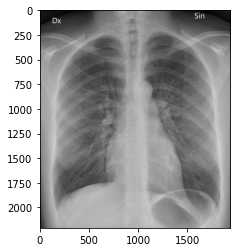

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('lung image.jpg')

plt.imshow(img, cmap='gray')

In [3]:
img_array = np.asarray(img)

In [4]:
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#cumulative histogram
chistogram_array = np.cumsum(histogram_array)

In [5]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

In [6]:
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

In [7]:
eq_img_array

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [50, 50, 50],
        [43, 43, 43],
        [47, 47, 47]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [49, 49, 49],
        [43, 43, 43],
        [49, 49, 49]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [52, 52, 52],
        [49, 49, 49],
        [49, 49, 49]]], dtype=uint8)

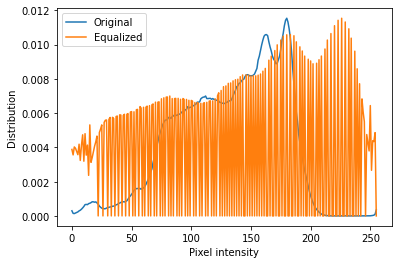

In [8]:
ori_pdf = histogram_array

eq_histogram_array = np.bincount(eq_img_array.flatten(), minlength=256)
num_pixels = np.sum(eq_histogram_array)
eq_pdf = eq_histogram_array/num_pixels

plt.figure()
plt.plot(ori_pdf)
plt.plot(eq_pdf)
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(['Original','Equalized'])

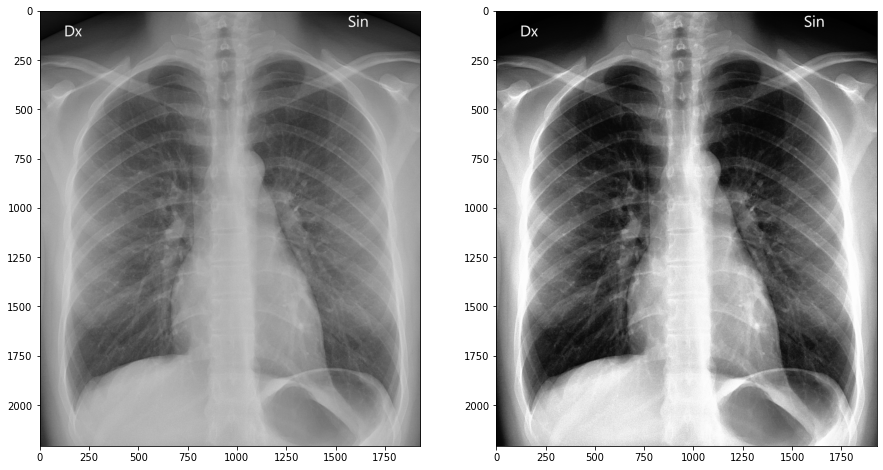

In [9]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(eq_img_array, cmap='gray')

plt.show(block=True)